In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models  
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [70]:
data_train_path = r"E:\Data Set\Fruits Classification\train"
data_test_path = r"E:\Data Set\Fruits Classification\test"
data_valid_path = r"E:\Data Set\Fruits Classification\valid"

In [71]:
img_width = 180
img_height = 180

In [72]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

In [73]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = True,
    validation_split = False,
)

Found 9700 files belonging to 5 classes.


In [74]:
train_names = data_train.class_names
train_names

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']

In [75]:
valid_data = tf.keras.utils.image_dataset_from_directory(
    data_valid_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = False,
    validation_split = False,
)

Found 200 files belonging to 5 classes.


In [76]:
test_data = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    batch_size = 32,
    shuffle = False,
    validation_split = False,
)

Found 100 files belonging to 5 classes.


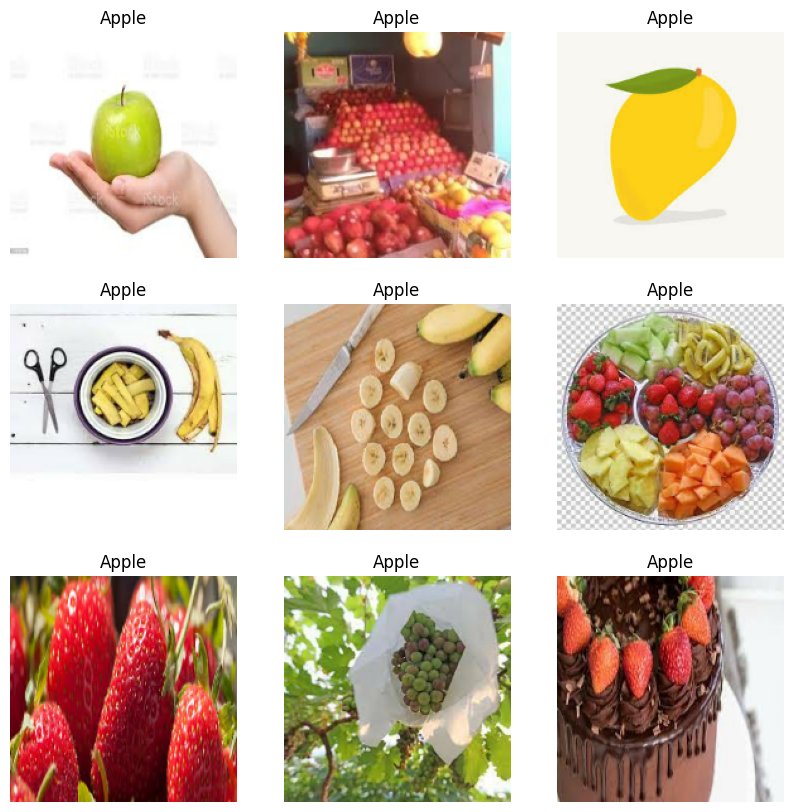

In [77]:
plt.figure(figsize=(10,10))
for image , labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(train_names[np.argmax(labels[i])])
        plt.axis('off')

In [78]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False


C:\Users\Talaat Mostafa\AppData\Local\Temp\ipykernel_24012\2517882765.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [79]:
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(len(train_names), activation='softmax')
])

In [82]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [83]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# تدريب الموديل
history = model.fit(
    data_train,
    validation_data=valid_data,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node Sum defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "d:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "d:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "d:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "d:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "d:\Anaconda\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "d:\Anaconda\Lib\asyncio\base_events.py", line 641, in run_forever

  File "d:\Anaconda\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "d:\Anaconda\Lib\asyncio\events.py", line 88, in _run

  File "d:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "d:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "d:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "d:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "d:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "d:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "d:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "d:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "d:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "d:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "d:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "d:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Talaat Mostafa\AppData\Local\Temp\ipykernel_24012\2955638809.py", line 4, in <module>

  File "d:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 371, in fit

  File "d:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 219, in function

  File "d:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 132, in multi_step_on_iterator

  File "d:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 113, in one_step_on_data

  File "d:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 60, in train_step

  File "d:\Anaconda\Lib\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "d:\Anaconda\Lib\site-packages\keras\src\trainers\trainer.py", line 354, in compute_loss

  File "d:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 1174, in losses

  File "d:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 1163, in _get_regularization_losses

  File "d:\Anaconda\Lib\site-packages\keras\src\regularizers\regularizers.py", line 265, in __call__

  File "d:\Anaconda\Lib\site-packages\keras\src\ops\numpy.py", line 6447, in sum

  File "d:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 2523, in sum

Invalid reduction dimension (1 for input with 1 dimension(s)
	 [[{{node Sum}}]] [Op:__inference_multi_step_on_iterator_121028]

In [ ]:
loss , accuracy = model.evaluate(data_train)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

304/304 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.8159 - loss: 0.4944
Test Loss: 0.4670, Test Accuracy: 0.8361


In [ ]:
image = r"E:\Data Set\Fruits Classification\test\Mango\Mango (70).jpeg"
img = tf.keras.utils.load_img(image , target_size=(img_width, img_height))
img_array = tf.keras.utils.img_to_array(img)
img_finl = tf.expand_dims(img_array , 0)

In [ ]:
pred = model.predict(img_finl)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [ ]:
score = (tf.nn.softmax(pred))
score

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.15104413, 0.15562135, 0.15045837, 0.39254594, 0.15033025]],
      dtype=float32)>

In [ ]:
print(f"Prediction Class : {train_names[np.argmax(score[0])]} , with a confidence of {max(score[0]) * 100 :.2f}%")

Prediction Class : Mango , with a confidence of 39.25%


In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7179 - loss: 0.6993
Test Loss: 0.7086, Test Accuracy: 0.7400


In [ ]:
data_pred = model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [ ]:
model.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7179 - loss: 0.6993


[0.7086486220359802, 0.7400000095367432]

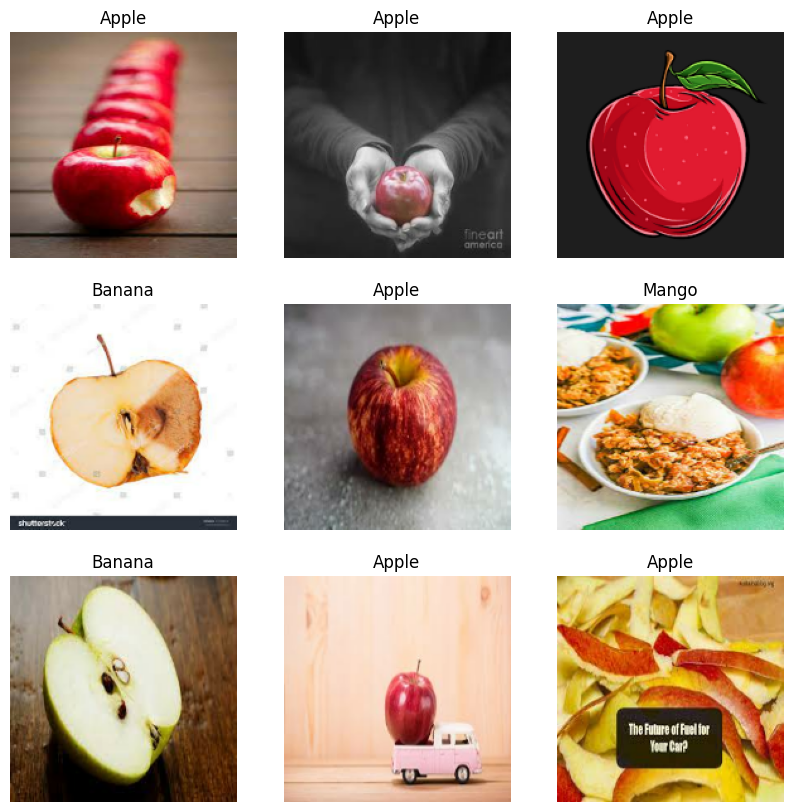

In [ ]:
plt.figure(figsize=(10,10))
for image , labels in test_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(train_names[np.argmax(data_pred[i])])
        plt.axis('off')

In [ ]:
model.save('fruit_classification_model.h5')